# Feature extraction and post-extraction EDA

## Choice of model
The [Inception v3](https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1) and [MobileNet v2](https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/2) are both up to the task, their TF Hub implementations have been trained on the ILSVRC-2012-CLS "ImageNet" data set, and have the [same signature for feature vectors](https://www.tensorflow.org/hub/common_signatures/images#feature-vector).

The MobileNet v2 is optimized for mobile applications. Since I'm not building a mobile application, I chose the Inception v3 model. This model has more parameters, expects slightly larger input images. 

In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import tensorflow as tf
import tensorflow_hub as hub

print('Tensorflow version: {}, TF hub version: {}'.format(tf.__version__, hub.__version__))

Tensorflow version: 1.12.0, TF hub version: 0.4.0


## Create a network
Create a network by loading the chosen pre-trained model from TF Hub.

In [27]:
img_graph = tf.Graph()

with img_graph.as_default():
    # pretrained network Inception v3
    module_url = 'https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1'
    #module_url = 'https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/2' # alternative model
    feature_extractor = hub.Module(module_url)
    
    # expected size of input images
    height, width = hub.get_expected_image_size(feature_extractor)
    
    # placeholder for input
    input_imgs = tf.placeholder(dtype=tf.float32, shape=[None, height, width, 3])
    
    # node that represents extracted high-level features
    imgs_features = feature_extractor(input_imgs)
    
    # initializers required by TensorFlow Hub
    init_op = tf.group(
        [tf.global_variables_initializer(), tf.tables_initializer()]
    )

img_graph.finalize() # make graph read-only

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


## Extract features from point clouds

In [54]:
import numpy as np
import os

def convert_images(X):
    """
    Standardize and convert the image data
    @param np_image_array 
    """
    X = X/255  # standardize values to 0-1
    X = np.stack((X, X, X), axis=2) # convert image from 1-channel to 3 channel
    return X

def load_point_cloud(dataset_name):
    """
    Load point cloud data
    @param dataset_name string 'train', 'test' or 'validate'
    @returns numpy.ndarray metadata, numpy.ndarray 299*299 3-channel flattened Images elevation, plan, section
    """
    with np.load(os.path.join('data', 'validate', 'point_clouds.npz'), allow_pickle=True) as data:
        test_data = dict(data.items())

    metadata = test_data['metadata']
    elevation = convert_images(test_data['elevation'])
    plan = convert_images(test_data['plan'])
    section = convert_images(test_data['section'])
    return metadata, elevation, plan, section

In [55]:
# Load the validation dataset
metadata, elevation, plan, section = load_point_cloud('validate')



Plot some images

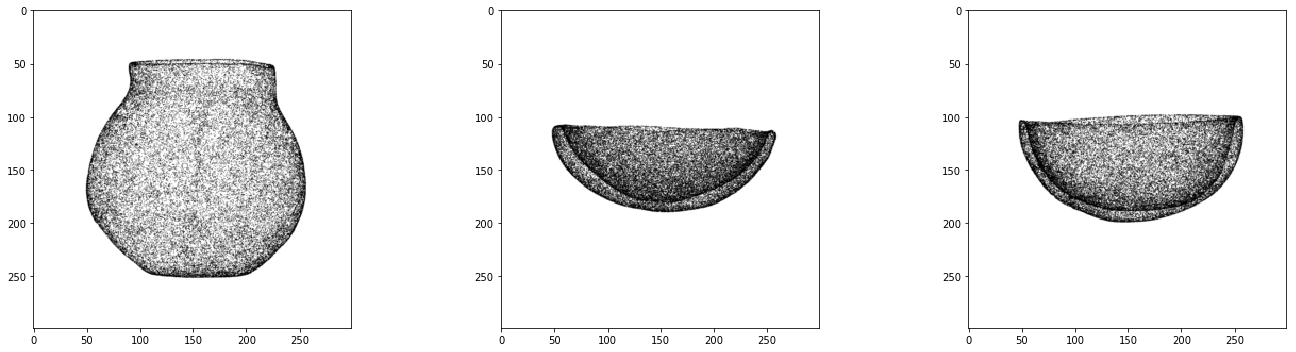

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1, 3, figsize=(20, 5))
for idx in range(3):
    flat_img = X[idx, :] # get some image
    img = flat_img.reshape(299,299, 3) # sqrt 784
    ax[idx].imshow(img, cmap=plt.cm.gray)
plt.tight_layout()
plt.show()